In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [3]:
from google.colab import files
files.upload()

Saving kaggle1.json to kaggle1.json


{'kaggle1.json': b'{"username":"aswathyck","key":"132f0bd5f097e156ce45cb662b14752a"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle1.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle1.json

In [5]:
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors
 97% 721M/743M [00:03<00:00, 233MB/s]
100% 743M/743M [00:03<00:00, 225MB/s]


In [6]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [7]:
# Paths to dataset directories
train_dir = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/New Plant Diseases Dataset(Augmented)/valid'

In [8]:
# Image Data Generator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [10]:
# Load DenseNet121 with pre-trained ImageNet weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [12]:

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Callbacks
checkpoint = ModelCheckpoint('best_densenet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [14]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [15]:

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 287s 450ms/step - accuracy: 0.6656 - loss: 0.9663 - val_accuracy: 0.8229 - val_loss: 0.4952
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 239s 411ms/step - accuracy: 0.8541 - loss: 0.4088 - val_accuracy: 0.8456 - val_loss: 0.4173
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 238s 410ms/step - accuracy: 0.8838 - loss: 0.3273 - val_accuracy: 0.8585 - val_loss: 0.4145
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 238s 410ms/step - accuracy: 0.9010 - loss: 0.2879 - val_accuracy: 0.8445 - val_loss: 0.4497
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 260s 406ms/step - accuracy: 0.9037 - loss: 0.2695 - val_accuracy: 0.8818 - val_loss: 0.3492
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 234s 404ms/step - accuracy: 0.9182 - loss: 0.2330 - val_accuracy: 0.9300 - val_loss: 0.2030
Epoch 7/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 262s 405ms/step - accuracy: 0.9230 - loss: 0.2192 - val_accuracy: 0.8892 - val_loss: 0.3272
Epoch 8/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 236s 408ms/step - accuracy: 0.9261 - loss: 0.20

In [17]:
# Save the final model
model.save('densenet_tomato_leaf__model.keras')

In [1]:
!nvidia-smi

Fri Jan 10 13:16:17 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [27]:
# Fine-tuning (Optional)
for layer in base_model.layers[-30:]:
    layer.trainable = True

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Class labels mapping
class_labels = {
    0: 'Tomato___Bacterial_spot',
    1: 'Tomato___Early_blight',
    2: 'Tomato___Late_blight',
    3: 'Tomato___Leaf_Mold',
    4: 'Tomato___Septoria_leaf_spot',
    5: 'Tomato___Spider_mites Two-spotted_spider_mite',
    6: 'Tomato___Target_Spot',
    7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    8: 'Tomato___Tomato_mosaic_virus',
    9: 'Tomato___healthy'
}


In [21]:
# Load the trained model
model = load_model('/content/densenet_tomato_leaf__model.h5')

In [22]:
img_path = '/content/00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

In [24]:
# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class index

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [25]:
# Map the prediction to the corresponding label
predicted_label = class_labels[predicted_class[0]]

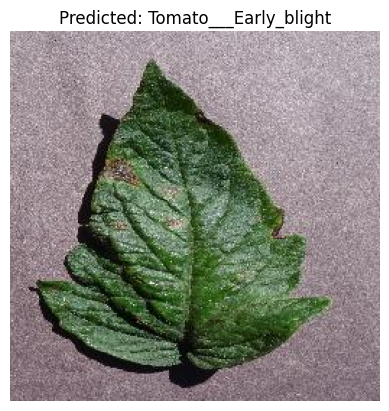

Class Probabilities: [1.8757410e-08 5.2070969e-01 2.7919149e-02 7.8774698e-05 7.8301858e-03
 1.7836871e-02 3.9602938e-01 1.9902513e-05 1.2587195e-03 2.8317301e-02]
Predicted Class: Tomato___Early_blight


In [26]:
# Display the image with the prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Print the class probabilities for reference
print("Class Probabilities:", predictions[0])
print(f"Predicted Class: {predicted_label}")

In [28]:


# Com pile ag  ain with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stop]
)



Epoch 1/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 268s 435ms/step - accuracy: 0.9613 - loss: 0.1095 - val_accuracy: 0.9522 - val_loss: 0.1403
Epoch 2/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 236s 408ms/step - accuracy: 0.9727 - loss: 0.0824 - val_accuracy: 0.9514 - val_loss: 0.1363
Epoch 3/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 238s 411ms/step - accuracy: 0.9715 - loss: 0.0796 - val_accuracy: 0.9557 - val_loss: 0.1267
Epoch 4/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 235s 405ms/step - accuracy: 0.9732 - loss: 0.0776 - val_accuracy: 0.9529 - val_loss: 0.1306
Epoch 5/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 260s 404ms/step - accuracy: 0.9739 - loss: 0.0735 - val_accuracy: 0.9533 - val_loss: 0.1304
Epoch 6/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 235s 405ms/step - accuracy: 0.9753 - loss: 0.0725 - val_accuracy: 0.9564 - val_loss: 0.1261
Epoch 7/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 268s 417ms/step - accuracy: 0.9767 - loss: 0.0681 - val_accuracy: 0.9559 - val_loss: 0.1259
Epoch 8/20
574/574 ━━━━━━━━━━━━━━━━━━━━ 233s 403ms/step - accuracy: 0.9760 -

In [29]:
# Save the final model
model.save('densenet_model.keras')